In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

In [3]:
plt.style.use("bmh")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 13,
    "axes.titlesize": 13,
    "axes.labelsize":13,
    "font.sans-serif": ["Helvetica"],
    "axes.facecolor": "#ffffff",
    "figure.autolayout": True,
    })

In [4]:
def name_gen(N,L,lag,ty,size):
    return 'RP_N{:},{:}_L{:}_mr_SR_lag{:}_type{:}_size{:}.dat'.format(N[0],N[1],L,lag,ty,size)

In [5]:
N = [256,256]
Ls = ['046.78','050.40','055.47','063.50']
lags = [1,2,5,10,20,50]
types = [1,2]
bounds = [2,3,5,10]

In [6]:
data_dict = {}
for Lind,L in enumerate(Ls):
    for lagind,lag in enumerate(lags):
        for tyind,ty in enumerate(types):
            for boundind,bound in enumerate(bounds):
                data = np.loadtxt(f'./L{L}/'+name_gen(N,L,lag,ty,bound))
                data_dict[(L,lag,ty,bound)] = data

In [36]:
for ty in types:
    for lag in lags:
        data_dict[('063.50',lag,ty,(6,200))][:,1] = np.zeros(len(data_dict[('063.50',lag,ty,(6,200))][:,1]))
        data_dict[('063.50',lag,ty,(6,200))][:,2] = np.zeros(len(data_dict[('063.50',lag,ty,(6,200))][:,1]))

In [7]:
N = [256,256]
Ls = ['046.78','050.40','055.47','063.50']
lags = [1,2,5,10,20,50]
types = [1,2]
bounds = [2,3,5,10]

In [17]:
colors = {1:'red',2:'blue'}
markers = {2:'x',3:'o',5:'v',10:'d'}
ylims = [(0.0,1.0),(0.0,2.0),(0.0,3.1),(0.0,6.0)]

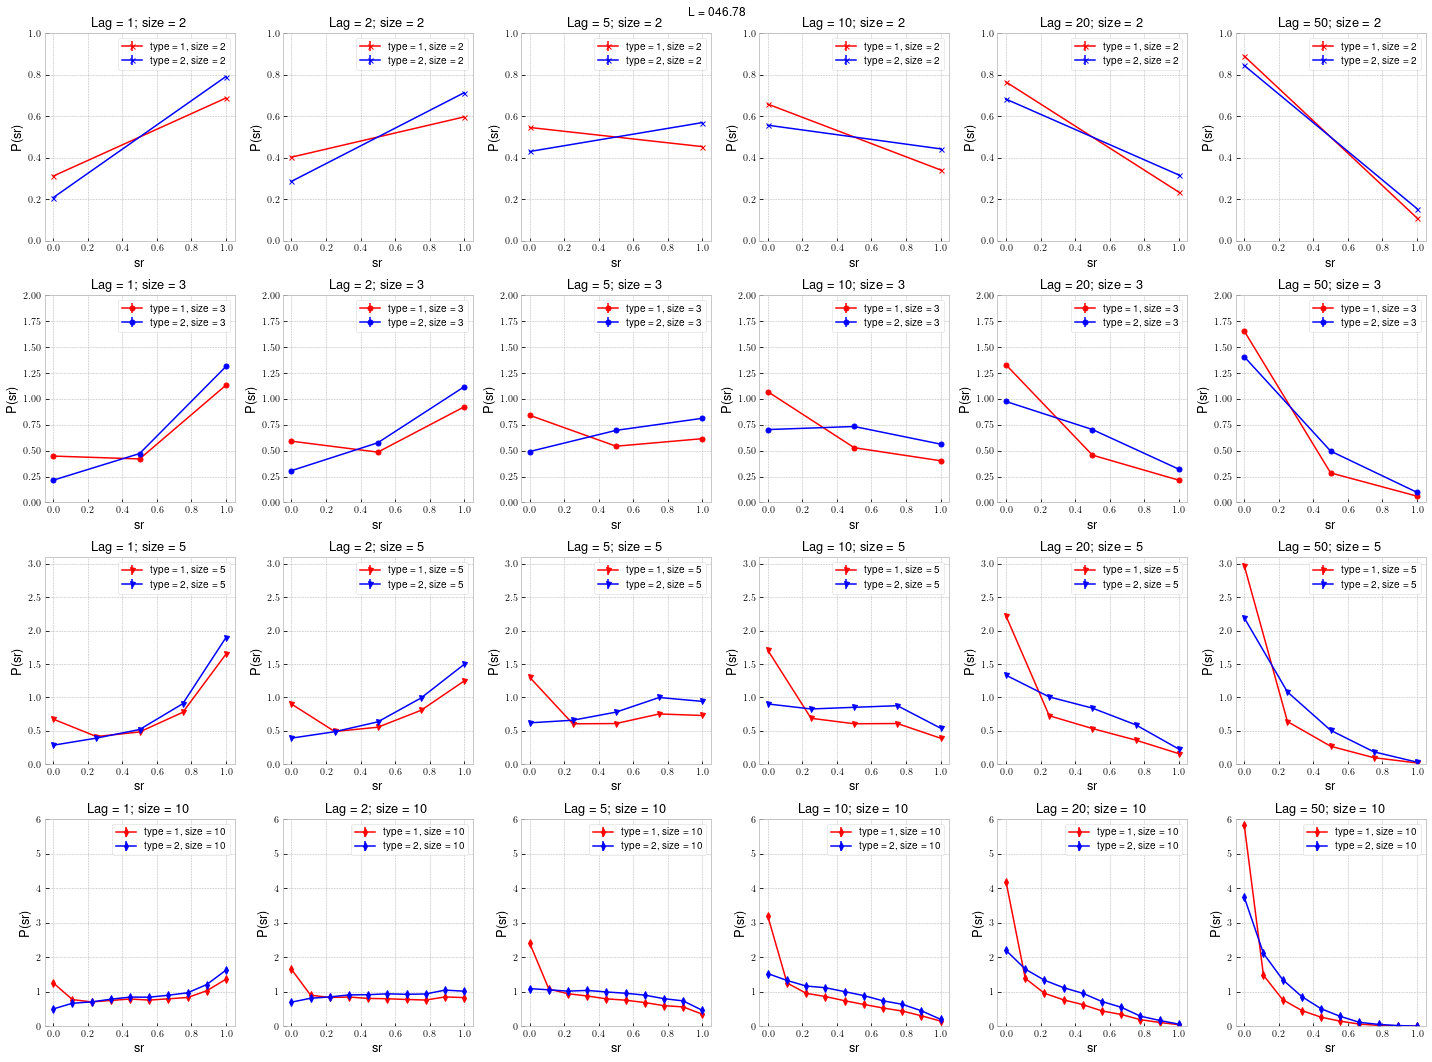

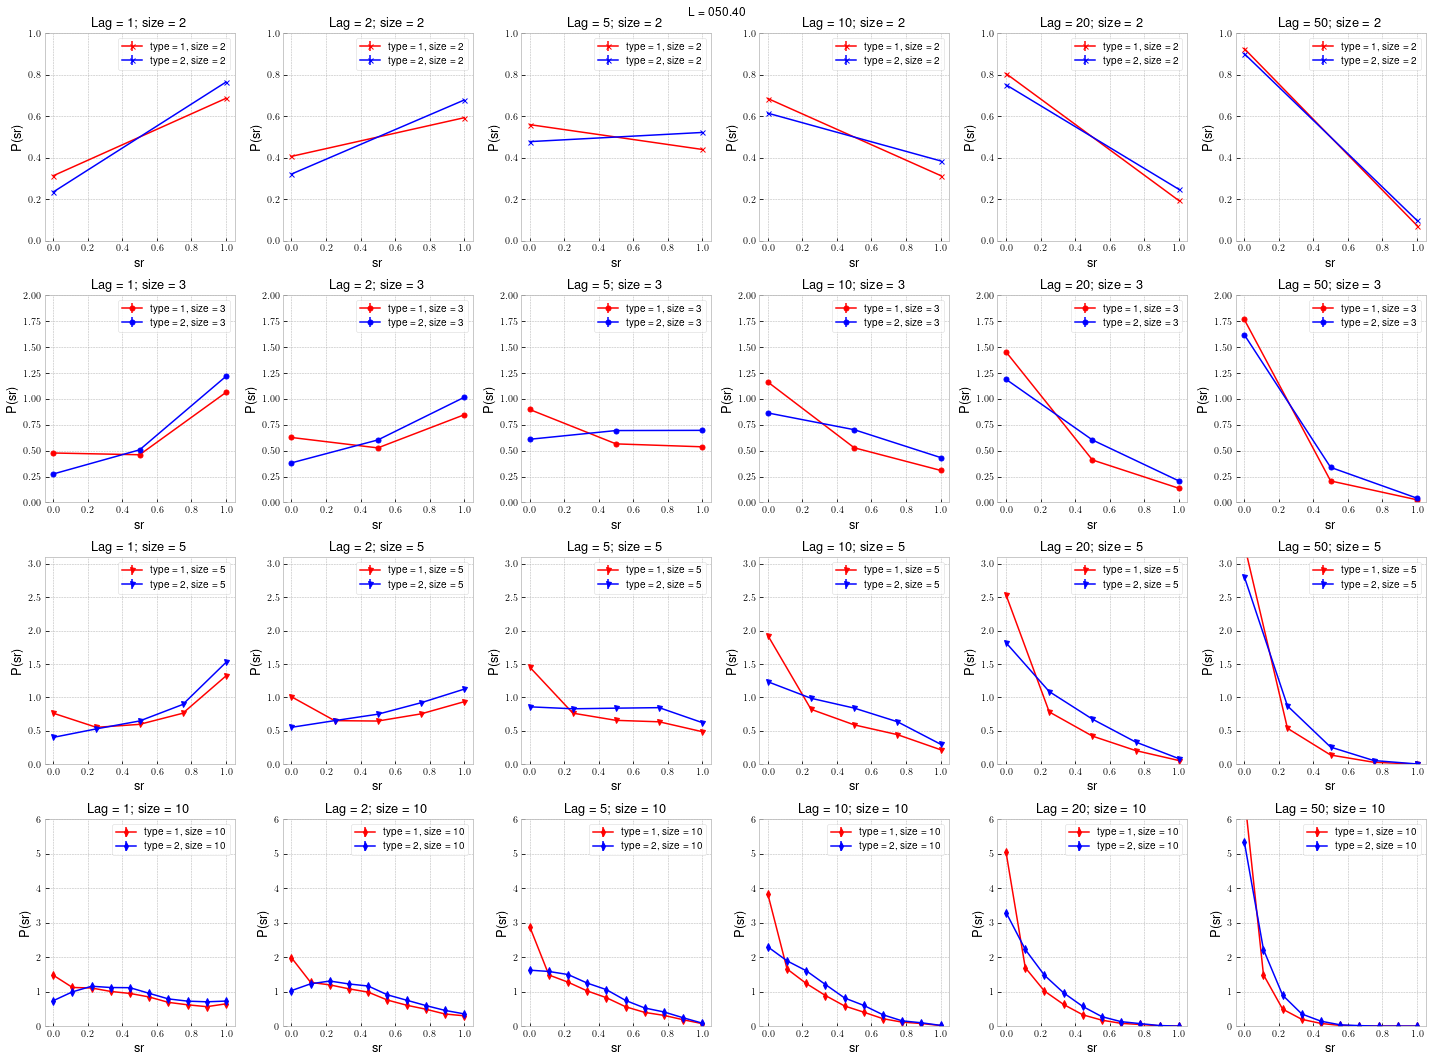

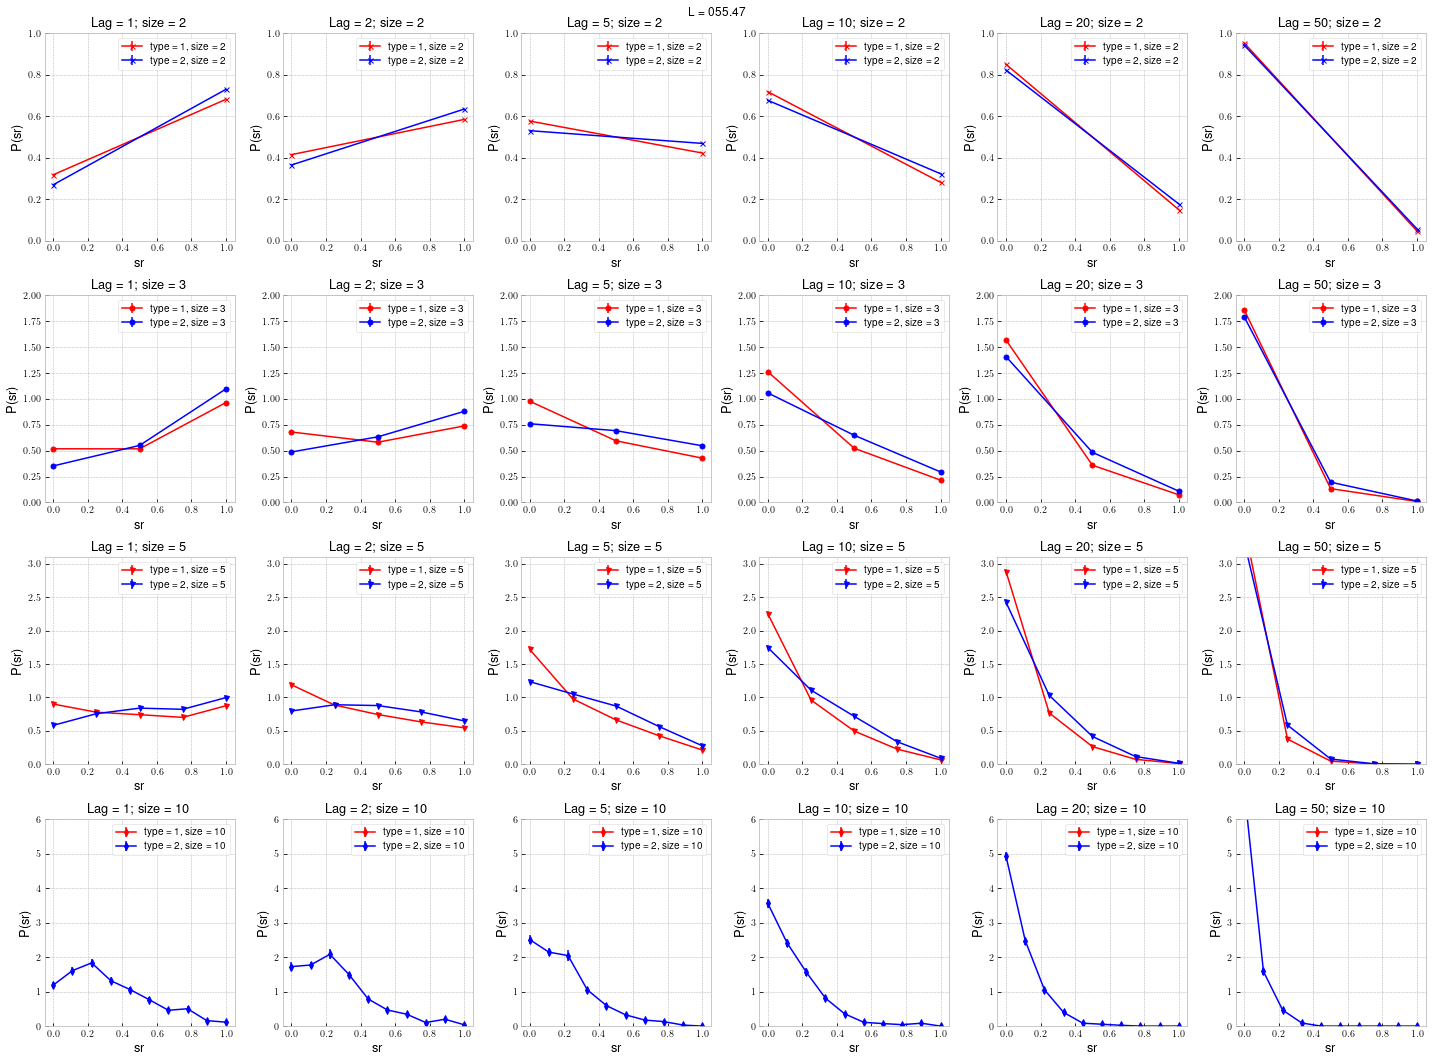

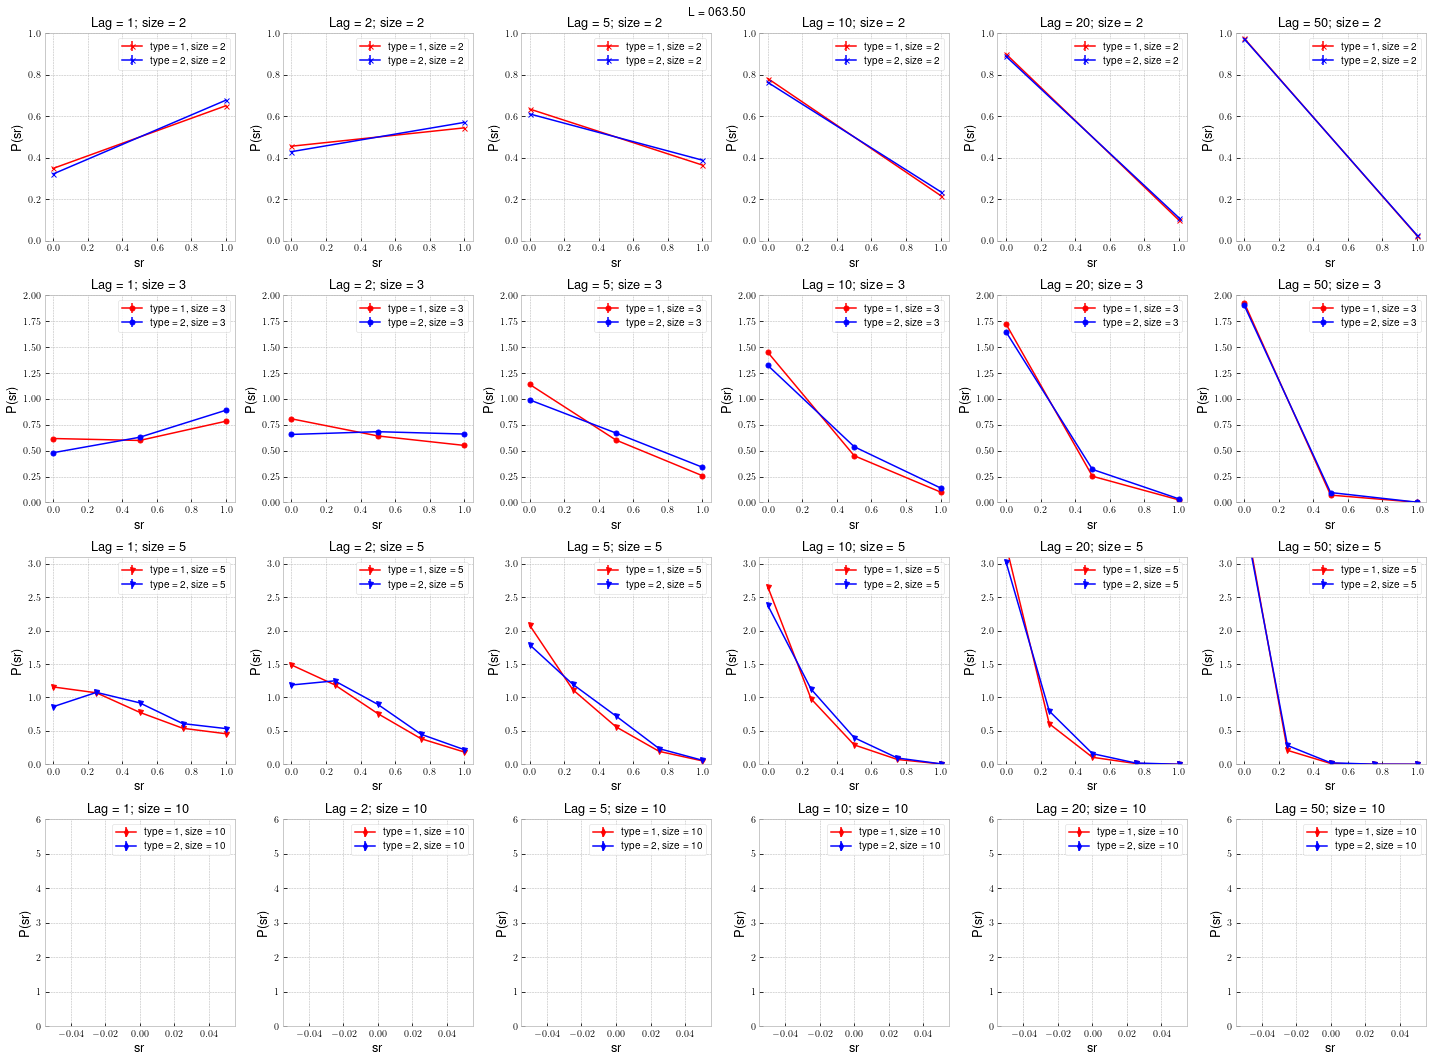

In [18]:
for Lind,L in enumerate(Ls):
    fig,axs = plt.subplots(len(bounds),len(lags),figsize=(20,15))
    fig.suptitle(f'L = {L}')
    for lagind,lag in enumerate(lags):
        for tyind,ty in enumerate(types):
            for boundind,bound in enumerate(bounds):
                data = np.array(data_dict[(L,lag,ty,bound)])
                norm = 1
                axs[boundind][lagind].errorbar(data[:,0],data[:,1]/norm,yerr=data[:,2]/norm,marker = markers[bound],markersize = 5.0,color = colors[ty],label = 'type = {:}, size = {:}'.format(ty,bound),linewidth = 1.5)
                axs[boundind][lagind].legend()
                axs[boundind][lagind].set_xlabel('sr')
                axs[boundind][lagind].set_ylabel('P(sr)')
                axs[boundind][lagind].set_title(f'Lag = {lag}; size = {bound} ')
                axs[boundind][lagind].set_ylim(ylims[boundind][0],ylims[boundind][1])
    plt.savefig(f'./plots/distribution_L{L}.pdf')
            
            

In [52]:
N = [256,256]
Ls = ['046.78','050.40','055.47','063.50']
lags = [1,2,5,10,20,50]
types = [1,2]
bounds = [2,3,5,10]

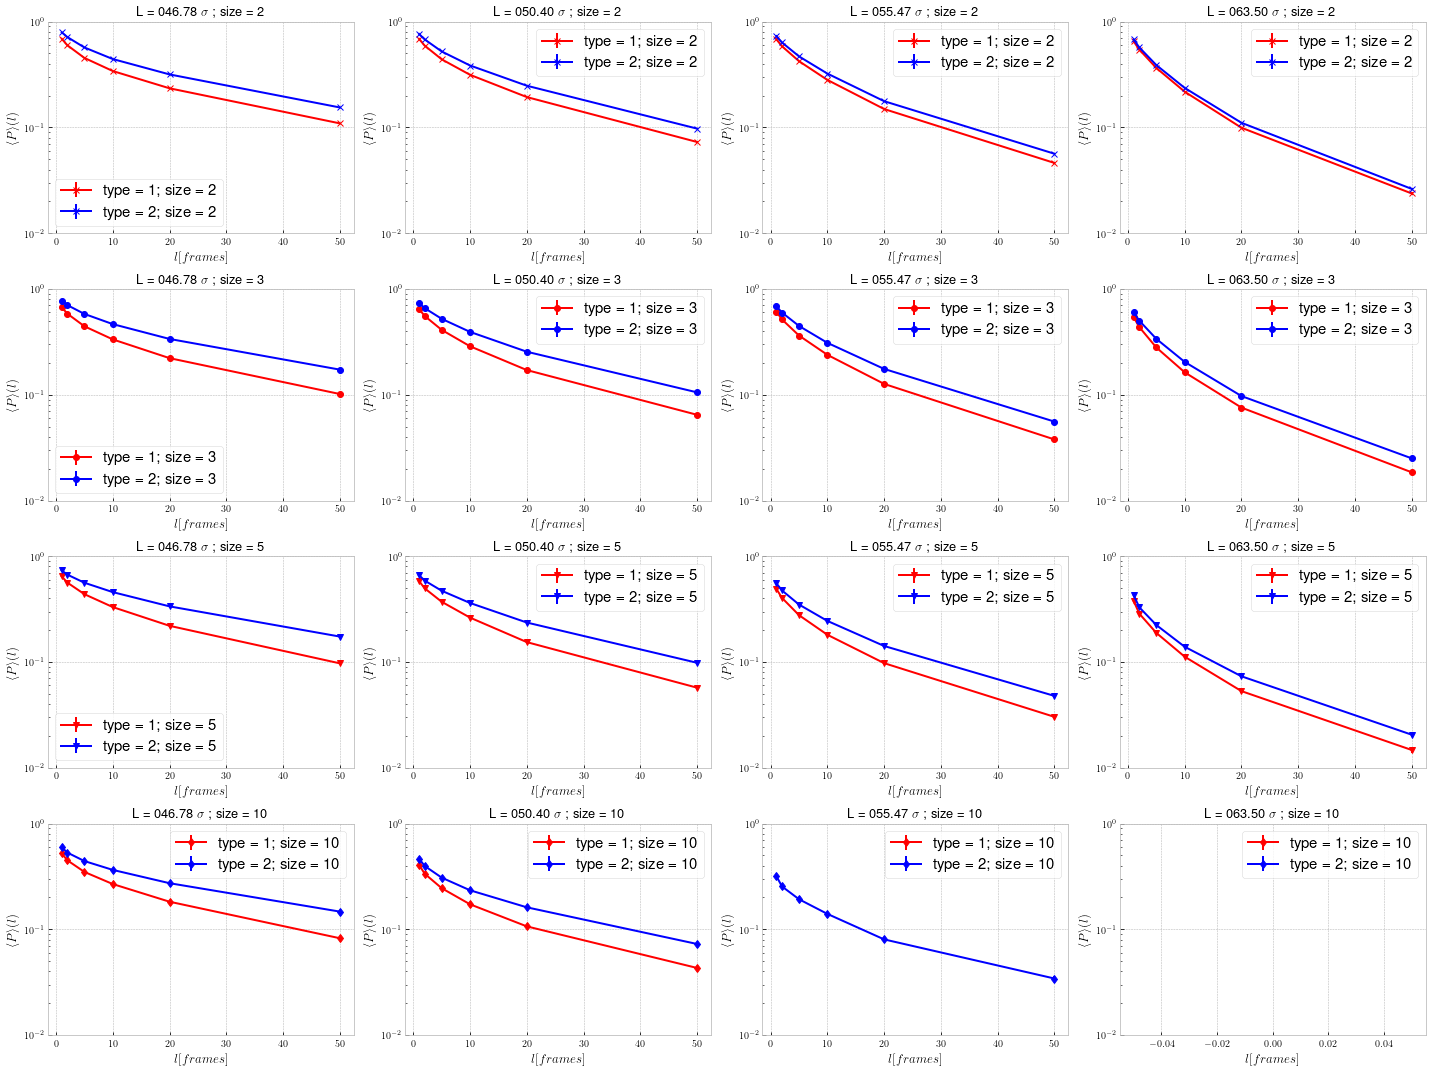

In [20]:
#colors = {1: 
 #             {2:'orangered',3:'red',5:'deeppink',10:'magenta'}
  #        ,
   #       2:
    #          {2:'cornflowerblue',3:'royalblue',5:'blue',10:'navy'} 
                      
    #     }
colors = {1:'red',2:'blue'}
markers = {2:'x',3:'o',5:'v',10:'d'}


fig,axs = plt.subplots(len(bounds),len(Ls),figsize=(20,15))
res_dict = {}
for Lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        for boundind,bound in enumerate(bounds):
            res = np.zeros((len(lags),3))
            for lagind,lag in enumerate(lags):
                data = np.array(data_dict[(L,lag,ty,bound)])
                norm = 1.0
                N = np.sum(data[:,1])
                data[:,1] = data[:,1]/norm
                data[:,2] = data[:,2]/norm
                mean = np.sum(data[:,0]*data[:,1]*(np.diff(data[:,0])[0]))
                err  = np.diff(data[:,0])[0]*np.sqrt(np.sum(data[:,0]**2*data[:,2]**2))
                #err = np.sum((data[:,0]-mean)**2*data[:,1]*np.diff(data[:,0])[0])/np.sqrt(N)
                #print(err1)
                #print(err)
                res[lagind,0] = lag
                res[lagind,1] = mean
                res[lagind,2] = err
            res_dict[(L,ty,bound)] = res
            axs[boundind][Lind].errorbar(res[:,0],res[:,1],yerr=res[:,2],color = colors[ty],marker = markers[bound], label = 'type = {:}; size = {:}'.format(ty,bound))
            axs[boundind][Lind].legend(fontsize = 15)
            axs[boundind][Lind].set_xlabel('$l[frames]$')
            axs[boundind][Lind].set_ylabel('$\ \langle P \\rangle(l)$')
            axs[boundind][Lind].set_title(f'L = {L} $\\sigma$ ; size = {bound}')
            axs[boundind][Lind].set_ylim(0.01,1.0)
            axs[boundind][Lind].set_yscale('log')
            #axs[Lind].set_xscale('log')
            
fig.savefig('./plots/mean_of_lag.pdf')

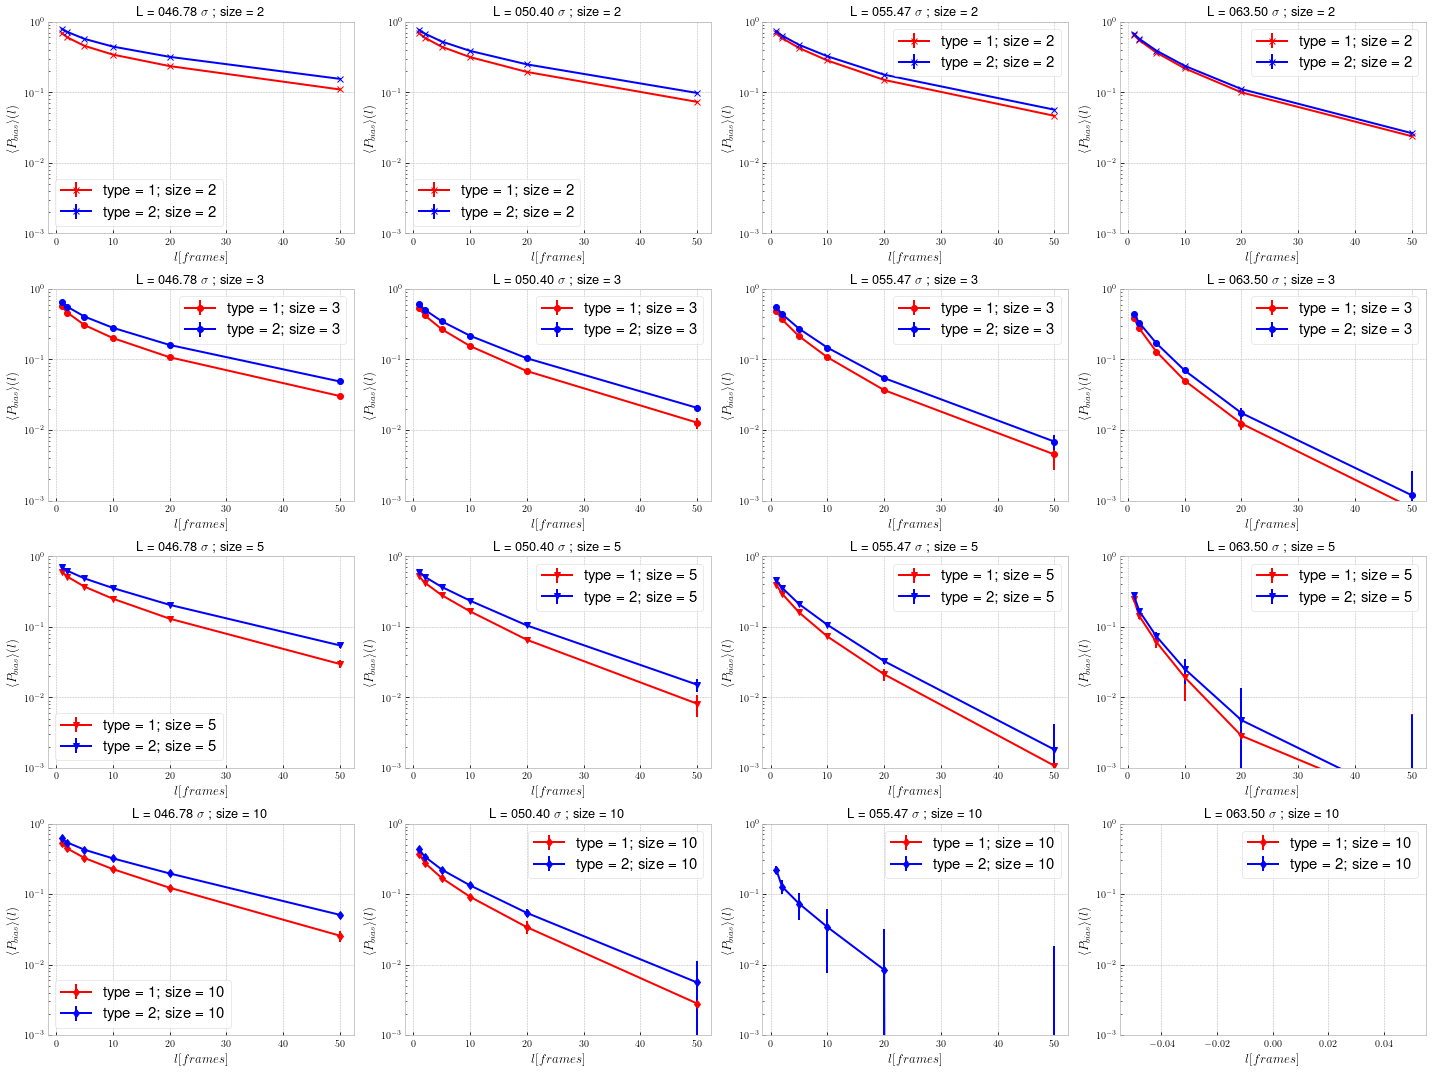

In [25]:
colors = {1:'red',2:'blue'}
markers = {2:'x',3:'o',5:'v',10:'d'}


fig,axs = plt.subplots(len(bounds),len(Ls),figsize=(20,15))
res_dict = {}
for Lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        for boundind,bound in enumerate(bounds):
            res = np.zeros((len(lags),3))
            for lagind,lag in enumerate(lags):
                data = np.array(data_dict[(L,lag,ty,bound)])
                norm = 1.0
                N = np.sum(data[:,1])
                data[:,1] = data[:,1]/norm
                data[:,2] = data[:,2]/norm
                mean = np.sum(data[:,1][data[:,0]>0.5]*(np.diff(data[:,0])[0]))
                err  = np.diff(data[:,0])[0]*np.sqrt(np.sum(data[:,2]**2))
                #err = np.sum((data[:,0]-mean)**2*data[:,1]*np.diff(data[:,0])[0])/np.sqrt(N)
                #print(err1)
                #print(err)
                res[lagind,0] = lag
                res[lagind,1] = mean
                res[lagind,2] = err
            res_dict[(L,ty,bound)] = res
            axs[boundind][Lind].errorbar(res[:,0],res[:,1],yerr=res[:,2],color = colors[ty],marker = markers[bound], label = 'type = {:}; size = {:}'.format(ty,bound))
            axs[boundind][Lind].legend(fontsize = 15)
            axs[boundind][Lind].set_xlabel('$l[frames]$')
            axs[boundind][Lind].set_ylabel('$\ \langle P_{{bias}} \\rangle(l)$')
            axs[boundind][Lind].set_title(f'L = {L} $\\sigma$ ; size = {bound}')
            axs[boundind][Lind].set_ylim(0.001,1.0)
            axs[boundind][Lind].set_yscale('log')

ValueError: array must not contain infs or NaNs

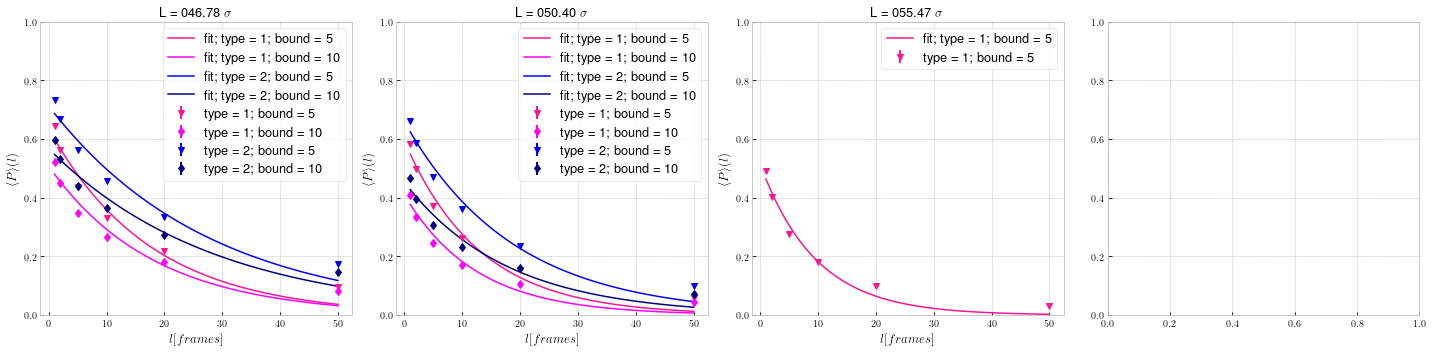

In [42]:
#trying to extract t_05

l = np.linspace(1,50,100)
f = lambda l,a,b: a*np.exp(-b*l)
fit_param_dict = {}

colors = {1: 
              {2:'orangered',3:'red',5:'deeppink',10:'magenta'}
          ,
          2:
              {2:'cornflowerblue',3:'royalblue',5:'blue',10:'navy'} 
                      
         }
markers = {2:'x',3:'o',5:'v',10:'d'}


fig,axs = plt.subplots(1,len(Ls),figsize=(20,5))
for Lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        for boundind,bound in enumerate(bounds):
            res = res_dict[(L,ty,bound)]
            popt,pcov = cf(f,res[:,0],res[:,1])
            perr = np.sqrt(np.diag(pcov))
            fit_param_dict[(L,ty,bound)] = np.array([[popt[0],perr[0]],[popt[1],perr[1]]])
            axs[Lind].plot(l,f(l,*popt),color = colors[ty][bound],linewidth = 1.5,label = f'fit; type = {ty}; bound = {bound}')
            axs[Lind].errorbar(res[:,0],res[:,1],yerr=res[:,2],color = colors[ty][bound],linestyle = 'none',marker = markers[bound], label = 'type = {:}; bound = {:}'.format(ty,bound))
            axs[Lind].legend(fontsize = 13)
            axs[Lind].set_xlabel('$l[frames]$')
            axs[Lind].set_ylabel('$\ \langle P \\rangle(l)$')
            axs[Lind].set_title(f'L = {L} $\\sigma$')
            axs[Lind].set_ylim(0.0,1.0)
fig.savefig('./plots/mean_of_lag_fits.pdf')

[0.04755254654719266, 0.05831931053432857, 0.06840162995791234, 0.0781816315558707]
[0.04489083030812888, 0.05271763989849413, 0.055347601320985575, 1.1299599228799353e-10]
[0.04536302523524787, 0.05684094296268506, 0.0678380808874457, 0.07801991336424348]
[0.03866760900759163, 0.049044216799050445, 0.05406659042806278, 1.1299599228799353e-10]


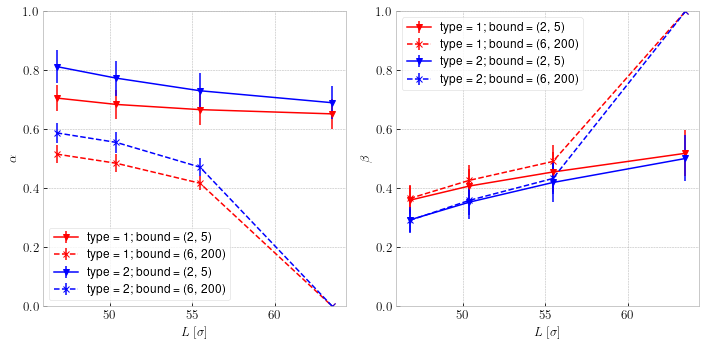

In [59]:
colors = {1:'red',2:'blue'}
markers = {(2,5):'v',(6,200):'x'}
linestyles = {(2,5):'solid',(6,200):'dashed'}
L_x = [46.78,50.40,55.47,63.50]
fig,axs = plt.subplots(1,2,figsize = (10,5))
for ty in types:
    for bound in bounds:
        res_exps = []
        res_exps_err = []
        res_coff = []
        res_coff_err = []
        for L in Ls:
            res_exps.append(fit_param_dict[(L,ty,bound)][1,0])
            res_exps_err.append(fit_param_dict[(L,ty,bound)][1,1])
            res_coff.append(fit_param_dict[(L,ty,bound)][0,0])
            res_coff_err.append(fit_param_dict[(L,ty,bound)][0,1])
        axs[1].errorbar(L_x,res_exps,yerr=res_exps_err,color = colors[ty],marker = markers[bound],linewidth = 1.5,linestyle = linestyles[bound],label = 'type = {:}; bound = {:}'.format(ty,bound))
        axs[1].set_ylim(0,1.0)
        axs[1].legend(fontsize = 12)
        axs[1].set_xlabel('$L \ [\\sigma]$')
        axs[1].set_ylabel('$\\beta$')
        
        
        axs[0].set_ylim(0,1.0)
        axs[0].errorbar(L_x,res_coff,yerr=res_coff_err,color = colors[ty],marker = markers[bound],linewidth = 1.5,linestyle = linestyles[bound],label = 'type = {:}; bound = {:}'.format(ty,bound))
        axs[0].legend(fontsize = 12)
        axs[0].set_xlabel('$L \ [\\sigma]$')
        axs[0].set_ylabel('$\\alpha$')
        print(res_exps_err)
fig.savefig('./plots/fit_params.pdf')

In [60]:
l = np.linspace(1,50,100)
f = lambda l,a,b: a/(l**b)
tau_cutoff = 0.51
tau_dict = {}
for tyind,ty in enumerate(types):
    for boundind,bound in enumerate(bounds):
        for Lind,L in enumerate(Ls):
            a = fit_param_dict[(L,ty,bound)][0,0]
            a_err = fit_param_dict[(L,ty,bound)][0,1]
            b = fit_param_dict[(L,ty,bound)][1,0]
            b_err = fit_param_dict[(L,ty,bound)][1,1]
            tau = ((1/tau_cutoff)*a)**(1/b)
            tau_err = np.sqrt((((1/tau_cutoff)/b)*((1/tau_cutoff)*a)**(1/b-1))**2*a_err**2 + 
                        (-((1/tau_cutoff)*a)**(1/b)*np.log((1/tau_cutoff)*a)/b**2)**2*b_err**2
                             )
            tau_dict[(L,ty,bound)] = [tau,tau_err]


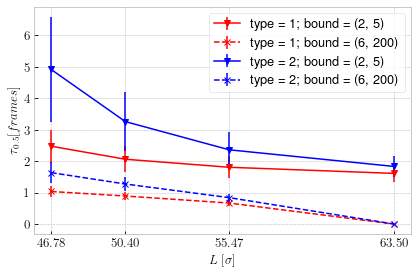

In [61]:

colors = {1:'red',2:'blue'}
markers = {(2,5):'v',(6,200):'x'}
linestyles = {(2,5):'solid',(6,200):'dashed'}

for tyind,ty in enumerate(types):
    for boundind,bound in enumerate(bounds):
        tau_arr = np.zeros((len(Ls),3))
        for Lind,L in enumerate(Ls):
            tau_arr[Lind,1:] = tau_dict[(L,ty,bound)]
            tau_arr[Lind,0]=L_x[Lind]
        plt.errorbar(tau_arr[:,0],tau_arr[:,1],yerr=tau_arr[:,2],color = colors[ty],linestyle = linestyles[bound],marker = markers[bound],linewidth = 1.5,label = 'type = {:}; bound = {:}'.format(ty,bound))
        plt.xticks(L_x)
        plt.xlabel('$L \ [\\sigma]$')
        plt.ylabel('$\\tau_{{0.5}}[frames]$')
        #plt.yscale('log')
        plt.legend()
plt.savefig('./plots/tau50s.pdf')